# LiuInt Low Variance Tests

In [3]:
# Import Packages
import numpy as np
import pandas as pd
import tableMakerv2 as tm2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib import animation
import time
import re
import warnings
from random import randint
import concurrent
from concurrent.futures import ProcessPoolExecutor
import multiprocessing as mp
import ipywidgets as wgt
from Archive import tableMaker as tableMaker

# Reimport changes when editing LiuInt or tableMaker
import importlib
importlib.reload(tm2)

<module 'tableMakerv2' from '/Users/cougar/jaredporter/inferno/codes/TableMakerMain/postGit/tableMakerv2.py'>

In [7]:
import LiuInt as LI
importlib.reload(LI)

numXim = 5
numXiv = 5
path = r"./data/extinctionMethane"
tvals = np.arange(0,11,1)
Lvals = [0.0001, 0.0044, 0.0046, 0.0048, 0.005, 0.006, 0.008, 0.02, 0.04, 0.08, 0.12, 0.16, 0.2]


# Create function for temperature based on data
phiFunc = tm2.phiFuncs(path, Lvals, tvals, Lt = [4, 4])

# Use Liu's method to integrate for phibar
n = 10
ximMean = 0.1
vars = np.logspace(-n, -1, n)
print(f"var = {0}, T = {LI.IntegrateForPhiBar(ximMean, 0, phiFunc, silence = True)}")
for var in vars:
    print(f"var = {var}, T = {LI.IntegrateForPhiBar(ximMean, var, phiFunc, silence = True)}")

var = 0, T = 1720.3542134135196
var = 1e-10, T = 1716.5714674288415
var = 1e-09, T = 1716.5715001724957
var = 1e-08, T = 1716.571827593634
var = 1e-07, T = 1716.575101788793
var = 1e-06, T = 1716.6078420297702
var = 1e-05, T = 1716.9350710648312
var = 0.0001, T = 1727.5762913279289
var = 0.001, T = 1694.4443703275088
var = 0.01, T = 1301.86607297085
var = 0.1, T = 300.00002761979704


## Visualizing the distribution

400.00000000000006
0.0 8.45149499744771e-294 0.0


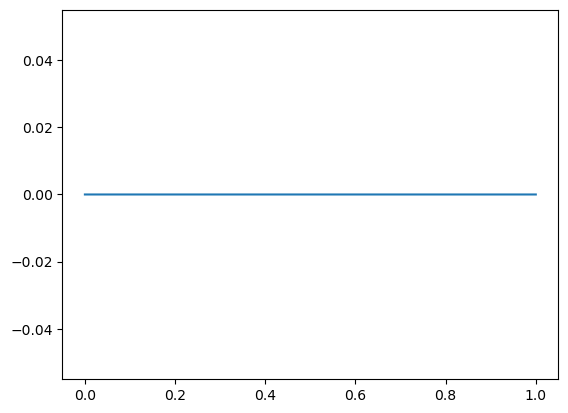

In [4]:
from scipy.integrate import quad
from scipy.special import gamma

a = 600
b = 400
ϵ = 1e-6

fmax = 1/(1 + (b - 1)/(a - 1))
print((a - 1 - fmax*(a - 2))/fmax)
def P(ξ, a, b):
    P = ξ**(a-1) * (1-ξ)**(b-1)       # βPDF, non-normalized
    return P

norm = ϵ**a/a + quad(P, ϵ, 1-ϵ, args = (a, b))[0] + ϵ**b/b
print(ϵ**a/a, quad(P, ϵ, 1-ϵ, args = (a, b))[0], ϵ**b/b)
xs = np.linspace(0, 1, int(1e6))
plt.plot(xs, P(xs, a, b))

## Testing Stirling's Approximation

/var/folders/55/0qqzz87s5sndf19sv42s64_c0000gq/T/ipykernel_74787/977628137.py:28: RuntimeWarning: invalid value encountered in divide
  err = (gammaRes-stirlingRes)/gammaRes


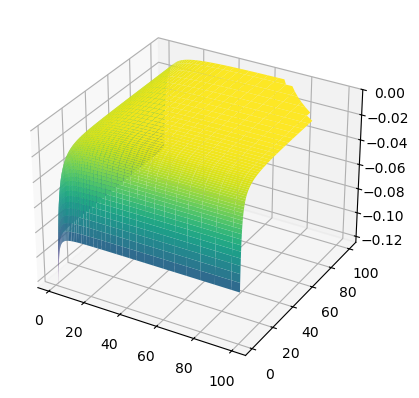

In [5]:
import matplotlib.pyplot as plt

# Does stirling's approximation work for the gamma function?
def stirlingNorm(a, b):
    # Uses logs to circumvent overflow
    q = (a+b-0.5)*np.log(a+b) - 0.5*np.log(2*np.pi) - (a-0.5)*np.log(a) - (b-0.5)*np.log(b)
    return np.exp(q)

def gammaNorm(a, b):
    return gamma(a+b)/gamma(a)/gamma(b)

As = np.logspace(0,2,100)
Bs = np.logspace(0,2,100)
AS, BS = np.meshgrid(As, Bs)

gammaRes = np.zeros(AS.shape)
stirlingRes = np.zeros(AS.shape)
for i in range(len(AS)):
    for j in range(len(BS[i])):
        gammaRes[i][j] = gammaNorm(AS[i][j], BS[i][j])
        stirlingRes[i][j] = stirlingNorm(AS[i][j], BS[i][j])

err = (gammaRes-stirlingRes)/gammaRes
# Plot contour
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
#ax.plot_surface(AS, BS, gammaRes, cmap = 'inferno')
#ax.plot_surface(AS, BS, stirlingRes, cmap = 'viridis')
ax.plot_surface(AS, BS, err, cmap = 'viridis')
ax.set_zlim((-0.125, 0));

# RESULT:
# Yes, the approximation is good (and gets better). 

## Testing function limits

In [6]:
# What is the gamma function's limit? 
gamma(171)

# RESULT:
# scipy.special.gamma can compute up to ~g(170)

In [8]:
# What is the limit of gammaNorm and stirlingNorm?
maxVal = 100
a = b = maxVal/2
print(f"gammaNorm:    {gammaNorm(a, b)}")
x = stirlingNorm(a, b)
print(f"stirlingNorm: {x}")

gammaNorm:    2.5222836136391058e+30
stirlingNorm: 2.5285971060366075e+30


## Summary of results
- Stirling's approximation is great, especially if only used in regimes that scipy.special.gamma can't reach

- Stirling's approximation (the way it's coded above) can compute the normalization factor for the beta PDF up to about a+b=1000. After that, it also hits a maximum.